In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [90]:
x = np.linspace(0,10,2000)
y = x
noise = np.random.normal(scale=1, size=x.size)

In [96]:
x2 = np.linspace(10,15,20)
y2 = x2
noise2 = np.random.normal(scale=1, size=x2.size)

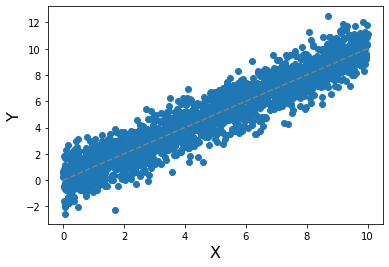

In [92]:
f, ax = plt.subplots(ncols=1)
ax = [ax]
# f.set_size_inches(10,4)
ax[0].scatter(x, y+noise)
fsize=16
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[0].plot(x, y, ls='--', c='gray')
plt.savefig("data.pdf")

In [93]:
fit_deg = [1, 2, 4, 8, 16, 32]
fits = []
mse = []
var = []
for deg in fit_deg:
    z = np.polyfit(x,y+noise,deg=deg)
    print(z)
    p = np.poly1d(z)
    fits.append(p)
    err = np.abs(p(x) - (y + noise))
    mse.append(np.mean(err**2))
    var.append(np.std(err))

[ 1.01676966 -0.02875022]
[0.00562108 0.96055887 0.06488756]
[ 5.12647471e-04 -1.05290162e-02  7.56629174e-02  7.97638115e-01
  1.51685933e-01]
[-1.00949159e-05  4.38569256e-04 -7.89195166e-03  7.57414474e-02
 -4.14706624e-01  1.27802113e+00 -2.01584799e+00  2.25552032e+00
 -1.01236080e-01]
[ 1.10171507e-08 -9.04434993e-07  3.36675521e-05 -7.51619031e-04
  1.12151200e-02 -1.17992346e-01  8.99803827e-01 -5.03481899e+00
  2.06901457e+01 -6.18802075e+01  1.32073799e+02 -1.94681001e+02
  1.88217311e+02 -1.09775406e+02  3.31224185e+01 -2.57361548e+00
  7.46155132e-02]
[-4.09698783e-23  1.91438289e-21 -2.70544285e-20 -1.76850779e-21
  2.15412417e-18  6.56326811e-18 -1.59556748e-16 -1.54840807e-15
  4.52044149e-15  1.79276716e-13  8.85628390e-13 -1.09117253e-11
 -1.66183648e-10 -6.89163876e-11  1.61844338e-08  1.00505016e-07
 -1.15058707e-06 -1.46425854e-05  8.37061920e-05  1.57085228e-03
 -1.13303334e-02 -1.14987886e-01  2.14801702e+00 -1.55232554e+01
  6.75419927e+01 -1.94925339e+02  3.8274

/home/eweissler/.conda/envs/cqed/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


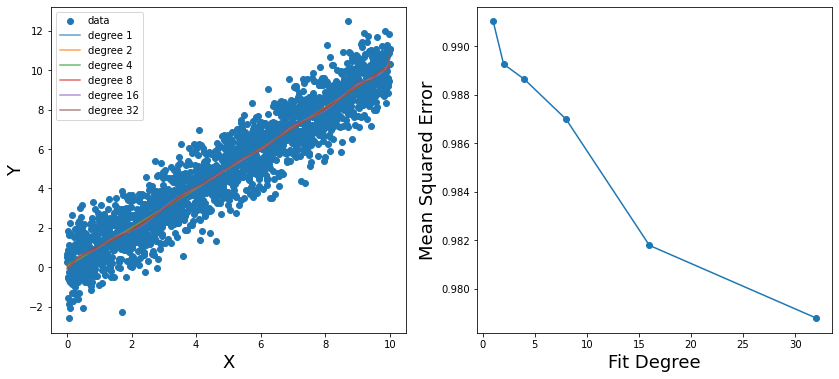

In [98]:
f, ax = plt.subplots(ncols=2)
f.set_size_inches(14,6)
ax[0].scatter(x, y + noise, label="data")
for i in range(len(fit_deg)):
    ax[0].plot(x, fits[i](x), label=f"degree {fit_deg[i]}", alpha=0.7)
ax[0].legend()
fsize=18
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[1].plot(fit_deg, mse, "-o")
ax[1].set_xlabel("Fit Degree", fontsize=fsize)
ax[1].set_ylabel("Mean Squared Error", fontsize=fsize)
# ax[2].plot(fit_deg, var)
plt.savefig("fits.pdf")

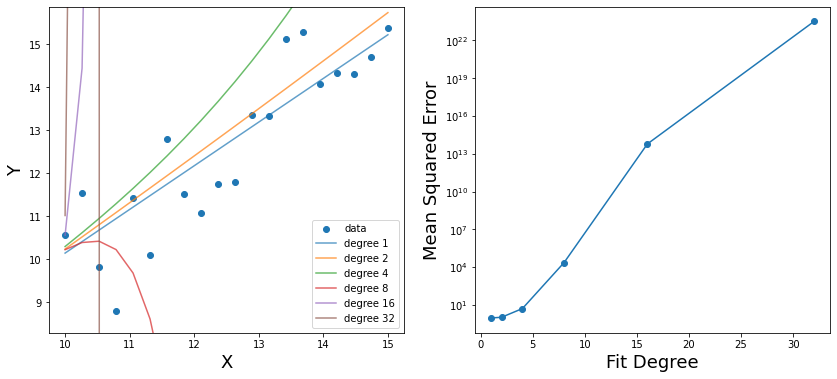

In [99]:
f, ax = plt.subplots(ncols=2)
f.set_size_inches(14,6)
ax[0].scatter(x2, y2 + noise2, label="data")
for i in range(len(fit_deg)):
    ax[0].plot(x2, fits[i](x2), label=f"degree {fit_deg[i]}", alpha=0.7)
ax[0].legend()
fsize=18
ax[0].set_xlabel("X", fontsize=fsize)
ax[0].set_ylabel("Y", fontsize=fsize)
ax[0].set_ylim(min(y2+noise2)-0.5, max(y2+noise2)+0.5)
mse2 = [np.mean((fits[i](x2) - y2 - noise2)**2) for i in range(len(fit_deg))]
ax[1].plot(fit_deg, mse2, "-o")
ax[1].set_xlabel("Fit Degree", fontsize=fsize)
ax[1].set_ylabel("Mean Squared Error", fontsize=fsize)
ax[1].set_yscale("log")
# ax[2].plot(fit_deg, var)
plt.savefig("fits2.pdf")

In [17]:
z = np.polyfit(x, y, deg=1)

In [22]:
p = np.poly1d(z)